# FIT5201 S1 2020 Assessment 1: Question 6- Multi class Perceptron


Student information
- Family Name:Muralitharan
- Given Name: Keerthana
- Student ID: 30159474
- Student email:kmur0015@student.monash.edu

Programming Language: R 3.3 in Jupyter Notebook

R Libraries used:
- reshape2
- ggplot

In [1]:
# Load libraries
library(ggplot2)
library(reshape2)

## Question I. 

Load Task1D_train.csv and Task1D_test.csv sets.


#### reading the train and test data sets

In [2]:
# read the csv data
train = read.csv("Task1D_train.csv")
test = read.csv("Task1D_test.csv")

# Separate labels and predictors
train.data = train[,-5]
train.label = train[,5]
test.data = test[,-5]
test.label = test[,5]

# Scale data
train.data=scale(train.data)
test.data=scale(test.data)


# Calculate the length of the train and test datasets
train.len = nrow(train)
test.len = nrow(test)

In [3]:
# unique test labels 
uni<-unique(test.label)
print(uni)

[1] C1 C2 C3
Levels: C1 C2 C3


## Question II.

Implement the multiclass perceptron as explained below

Initialise the weight vectors randomly w1,..,wK
- • While not converged do:
- o For n = 1 to N do:
- ▪ y = argmaxk wk . xn
- ▪ If yn != tn do
- • 𝒘𝑦𝑛:=𝒘𝑦𝑛−η𝒙𝑛
- • 𝒘𝑡𝑛:=𝒘𝑡𝑛+η𝒙𝑛

#### **K = 3** since it is a 3 class perceptron

Since we have 3 unique classes, 3 weight vectors are initialised 

#### Multiclasss perceptron function

The parameters are set and the weight vectors are randomly initialised with values, prediction for each class is calculated until the termination condition is met by recalculating the terminating condition for every datapoint. 

In [4]:
multi_class_perceptron <- function(train.data, train.label, eta, epsilon, tau.max) {
    
    # epsilon: Stoping criterion
    # eta: Learning Rate
    # tau.max: Maximum number of iterations
    
    
    Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 to training data
    T <- train.label # rename just for conviniance
    
    # Weight vectors for each 3 classes
    W.1 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    W.2 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    W.3 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
    
    W.1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
    W.2[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
    W.3[1,] <- runif(ncol(Phi)) # Random initial values for weight vector

    error = matrix(,nrow=tau.max, ncol=1) # To store error values

    tau <- 1 # iteration counter 
    terminate <- FALSE # termination status
    
    
    while(!terminate){
    
    # Shuffle the data
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]
    
    #For each point...
    for (i in train.index){
        
        # Check the termination creteria
        if (tau == tau.max) {break}
        
        # Calculate the predictions of current models for current point
        val1= W.1[tau,]%*%Phi[i,]
        val2= W.2[tau,]%*%Phi[i,]
        val3= W.3[tau,]%*%Phi[i,]
        max = max(val1,val2,val3)

        
        # If prediction doesn't match with label...
        if (val1==max && T[i]!="C1"|val2==max && T[i]!="C2"|val3==max && T[i] !="C3"){
            
            # Increase iteration counter
            tau = tau +1
            
            # Update coefficients
            if (T[i]=='C1' && max==val2){
                W.1[tau,] = W.1[tau-1,] + eta*Phi[i,]
                W.2[tau,] = W.2[tau-1,] - eta*Phi[i,]
                W.3[tau,] = W.3[tau-1,]
            
            }else if (T[i]=='C1' && max==val3){
                W.1[tau,] = W.1[tau-1,] + eta*Phi[i,]
                W.2[tau,] = W.2[tau-1,]
                W.3[tau,] = W.3[tau-1,] - eta*Phi[i,]
            
            }else if (T[i]=='C2' && max==val1){
                W.1[tau,] = W.1[tau-1,] - eta*Phi[i,]
                W.2[tau,] = W.2[tau-1,] + eta*Phi[i,]
                W.3[tau,] = W.3[tau-1,]
            }else if (T[i]=='C2' && max==val3){
                W.1[tau,] = W.1[tau-1,]
                W.2[tau,] = W.2[tau-1,] + eta*Phi[i,]
                W.3[tau,] = W.3[tau-1,] - eta*Phi[i,]
            
            }else if (T[i]=='C3' && max==val2){
                W.1[tau,] = W.1[tau-1,]
                W.2[tau,] = W.2[tau-1,] - eta*Phi[i,]
                W.3[tau,] = W.3[tau-1,] + eta*Phi[i,]
                
            }else if (T[i]=='C3' && max==val1){
                W.1[tau,] = W.1[tau-1,] - eta*Phi[i,]
                W.2[tau,] = W.2[tau-1,]
                W.3[tau,] = W.3[tau-1,] + eta*Phi[i,]
               
            }
         
        }        
    }
    
    # Calculate predictions for current models and the error value
    predictions=as.data.frame(cbind(t(W.1[tau,]%*%t(Phi)),t(W.2[tau,]%*%t(Phi)),t(W.3[tau,]%*%t(Phi))))
    for (row in 1:nrow(predictions)){
        predictions[row,'pred']=paste('C', which.max(predictions[row,]),sep = '')
    }
    error.percentage=1-(sum(predictions[,'pred']==T)/nrow(predictions))
    
    
    # recalculate termination conditions
    terminate <- (tau >= tau.max | (error.percentage<=epsilon))
    }

    # Done, trim the dataframes
    W.1 <- W.1[1:tau,]
    W.2 <- W.2[1:tau,]
    W.3 <- W.3[1:tau,]
    
    return(list(W.1,W.2,W.3))
    
}

In [5]:
#predicting the multiclass perceptron for every batch 
multi_class_prediction <- function(test.data, test.label, W.1, W.2, W.3){
    # test data appropriate for multiplication with model parameters
    test.Phi <- as.matrix(cbind(1, test.data))

    # Data frame to store error values and corresponding batch
    error.percentage=data.frame(0,ncol=2)
    colnames(error.percentage)=c('Batch','Error Percentage')
    
    # Initilise batch.no
    batch.no=0

    # For every training batch
    for (batch in seq(5,nrow(W.1),by=5)){
        # Calculate batch No
        batch.no= batch.no + 1

        # Make predictions on entire test data using each W
        predictions=as.data.frame(cbind(t(W.1[batch,]%*%t(test.Phi)),t(W.2[batch,]%*%t(test.Phi)),t(W.3[batch,]%*%t(test.Phi))))     

        # Classify predicted points
        for (row in 1:nrow(predictions)){
            predictions[row,'pred']=paste('C', which.max(predictions[row,]),sep = '')
        }

        # Store Batch no and Ratio of missclassifications
        error.percentage[batch.no,1]=batch.no
        error.percentage[batch.no,2]=1-(sum(predictions[,'pred']==test.label)/nrow(predictions))

}
    
    return(list(predictions, error.percentage))
    
}

## Question III. A
Train two multiclass perceptron models on the provided training data by setting the learning rates η to .09 and .01 respectively. Note that all parameter settings stay the same, except the learning rate, when building each model.

##### perceptron with the learning rate as 0.9

The misclassification are calculated for every batch size for learning rate (eta) to be 0.09 .A graph is plotted for all the batches.

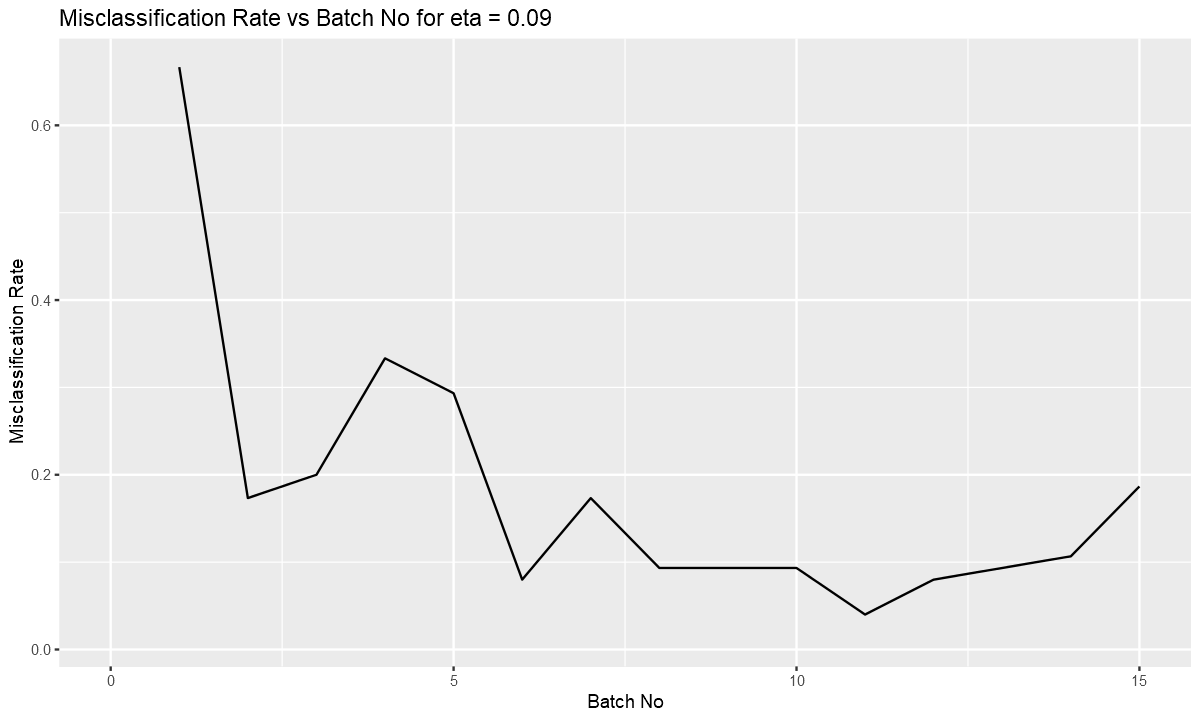

In [56]:
set.seed(50)
options(warn=-1)
# Train the model
model_coefficients = multi_class_perceptron(train.data, train.label, eta=0.09, epsilon=0.001, tau.max=1000)
W.1 = as.matrix(as.data.frame(model_coefficients[1]))
W.2 = as.matrix(as.data.frame(model_coefficients[2]))
W.3 = as.matrix(as.data.frame(model_coefficients[3]))

# Make predictions
voted = multi_class_prediction(test.data, test.label, W.1, W.2, W.3)
predictions = voted[1]
error.percentage = voted[2]

# Size the plot
options(repr.plot.width=10, repr.plot.height=6)
# Graph for Batch no vs Misclassification Rate
error.m=melt(error.percentage, id='Batch')
ggplot(data=error.m, aes(Batch,value)) + 
labs(y='Misclassification Rate', x='Batch No') + xlim(0,15)+
ggtitle('Misclassification Rate vs Batch No for eta = 0.09') +
geom_line()

#### perceptron with learning rate 0.1


The misclassification are calculated for every batch size for learning rate (eta) to be 0.01 .A graph is plotted for all the batches.

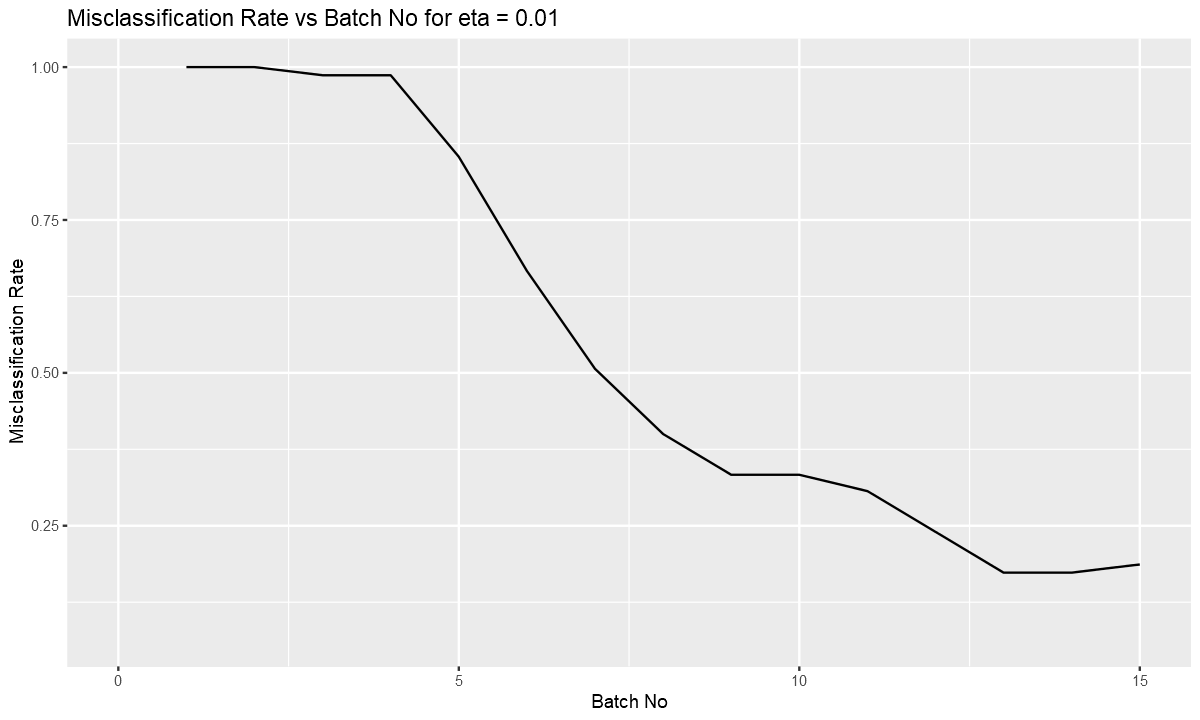

In [55]:
set.seed(50)
# Train the model
model_coefficients = multi_class_perceptron(train.data, train.label, eta=0.01, epsilon=0.001, tau.max=1000)
W.1 = as.matrix(as.data.frame(model_coefficients[1]))
W.2 = as.matrix(as.data.frame(model_coefficients[2]))
W.3 = as.matrix(as.data.frame(model_coefficients[3]))

# Make predictions
voted = multi_class_prediction(test.data, test.label, W.1, W.2, W.3)
predictions = voted[1]
error.percentage = voted[2]

# Size the plot
options(repr.plot.width=10, repr.plot.height=6)
# Graph for Batch no vs Missclassification Rate
error.m=melt(error.percentage, id='Batch')
ggplot(data=error.m, aes(Batch,value)) + 
labs(y='Misclassification Rate', x='Batch No') +
xlim(0,15)+
ggtitle('Misclassification Rate vs Batch No for eta = 0.01') +
geom_line()

## Question :

explain how the testing errors of two models behave differently, as the training data increases,

### Observation :

###### Model 1 - eta -> 0.01
As the training data increases the, misclassfication with the testing data decreases  gradually and converges without deviations.

###### Model 2 - eta -> 0.09
As the training data increases the, misclassfication with the testing data decreases and converges with deviations.


when Learning value increases we will see more fluctuations while it converges and and when the learning value is less it converges very quickly

#### References
https://www.kaggle.com/anlgrbz/implementation-of-multiclass-perceptron

https://inst.eecs.berkeley.edu/~cs188/sp12/slides/cs188%20lecture%2021%20--%20perceptron%206PP.pdf